# 1 Pengumpulan Data

Dataset yang digunakan https://archive.ics.uci.edu/dataset/45/heart+disease

# 2 Menelaah Data

pilih dan masukan library yang anda butuhkan untuk menelaah data

In [1]:
import pandas as pd
import re
import numpy as np
import itertools
import pickle

## Load Data

In [2]:
dir = 'dataset/cleveland.data'

In [3]:
# buatlah iterasi untuk membaca dataset
with open(dir, encoding='Latin1') as file:
    lines = [line.strip() for line in file]

In [4]:
lines[:10]

['1 0 63 1 -9 -9 -9',
 '-9 1 145 1 233 -9 50 20',
 '1 -9 1 2 2 3 81 0',
 '0 0 0 0 1 10.5 6 13',
 '150 60 190 90 145 85 0 0',
 '2.3 3 -9 172 0 -9 -9 -9',
 '-9 -9 -9 6 -9 -9 -9 2',
 '16 81 0 1 1 1 -9 1',
 '-9 1 -9 1 1 1 1 1',
 '1 1 -9 -9 name']

setelah membaca file dataset lakukan iterasi sesuai jumlah kolom dan baris yang ada pada dataset. Untuk keterangan kolom dan baris dapat dilihat melalui deskripsi dataset yang sudah dijelaskan sebelumnya

In [5]:
data = itertools.takewhile(
  lambda x: len(x) == 76,
  (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10))
)

df = pd.DataFrame.from_records(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1,0,63,1,-9,-9,-9,-9,1,145,...,1,1,1,1,1,1,1,-9,-9,name
1,2,0,67,1,-9,-9,-9,-9,4,160,...,1,1,1,1,1,1,1,-9,-9,name
2,3,0,67,1,-9,-9,-9,-9,4,120,...,2,2,1,1,1,7,3,-9,-9,name
3,4,0,37,1,-9,-9,-9,-9,3,130,...,1,1,1,1,1,1,1,-9,-9,name
4,6,0,41,0,-9,-9,-9,-9,2,130,...,1,1,1,1,1,1,1,-9,-9,name


menampilan informasi dari file dataset yang sudah dimasukkan kedalam dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       282 non-null    object
 1   1       282 non-null    object
 2   2       282 non-null    object
 3   3       282 non-null    object
 4   4       282 non-null    object
 5   5       282 non-null    object
 6   6       282 non-null    object
 7   7       282 non-null    object
 8   8       282 non-null    object
 9   9       282 non-null    object
 10  10      282 non-null    object
 11  11      282 non-null    object
 12  12      282 non-null    object
 13  13      282 non-null    object
 14  14      282 non-null    object
 15  15      282 non-null    object
 16  16      282 non-null    object
 17  17      282 non-null    object
 18  18      282 non-null    object
 19  19      282 non-null    object
 20  20      282 non-null    object
 21  21      282 non-null    object
 22  22      282 non-null    ob

Pada kondisi dataset yang kita miliki terdapat kondisi khusus yang dimana sebelum memasuki tahap validasi data untuk tipe data object atau string perlu dilakukan penghapusan fitur dikarenakan pada dataset ini nilai null disimbolkan dengan angka -9.0

In [7]:
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)

mengubah tipe data file dataset menjadi tipe data float sesuai dengan nilai null yaitu -9.0

In [8]:
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       282 non-null    float64
 1   2       282 non-null    float64
 2   3       282 non-null    float64
 3   4       282 non-null    float64
 4   5       282 non-null    float64
 5   6       282 non-null    float64
 6   7       282 non-null    float64
 7   8       282 non-null    float64
 8   9       282 non-null    float64
 9   10      282 non-null    float64
 10  11      282 non-null    float64
 11  12      282 non-null    float64
 12  13      282 non-null    float64
 13  14      282 non-null    float64
 14  15      282 non-null    float64
 15  16      282 non-null    float64
 16  17      282 non-null    float64
 17  18      282 non-null    float64
 18  19      282 non-null    float64
 19  20      282 non-null    float64
 20  21      282 non-null    float64
 21  22      282 non-null    float64
 22  23

# 3. Validasi Data

Pada tahap ini bertujuan untuk mengetahui dan memahami isi dari dataset agar dapat dilakukan penanganan sesuai dengan kondisinya mengubah nilai -9.0 menjadi nilai null value sesuai dengan deskripsi dataset

In [9]:
df.replace(-9.0, np.nan, inplace=True)

In [10]:
# menghitung jumlah nilai null value

df.isnull().sum()


1       0
2       0
3       0
4     282
5     282
     ... 
70      0
71      0
72      0
73    282
74    282
Length: 74, dtype: int64

In [11]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,63.0,1.0,NaN,NaN,NaN,NaN,1.0,145.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,160.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,120.0,1.0,...,NaN,2.0,2.0,1.0,1.0,1.0,7.0,3.0,NaN,NaN
3,0.0,37.0,1.0,NaN,NaN,NaN,NaN,3.0,130.0,0.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,41.0,0.0,NaN,NaN,NaN,NaN,2.0,130.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       282 non-null    float64
 1   2       282 non-null    float64
 2   3       282 non-null    float64
 3   4       0 non-null      float64
 4   5       0 non-null      float64
 5   6       0 non-null      float64
 6   7       0 non-null      float64
 7   8       282 non-null    float64
 8   9       282 non-null    float64
 9   10      282 non-null    float64
 10  11      282 non-null    float64
 11  12      0 non-null      float64
 12  13      277 non-null    float64
 13  14      277 non-null    float64
 14  15      282 non-null    float64
 15  16      23 non-null     float64
 16  17      282 non-null    float64
 17  18      282 non-null    float64
 18  19      282 non-null    float64
 19  20      282 non-null    float64
 20  21      282 non-null    float64
 21  22      280 non-null    float64
 22  23

# 4. Menentukan Object Data

In [13]:
# Memilih 14 fitur yang akan digunakan sesuai dengan deskripsi dataset

df_selected = df.iloc[:, [1, 2, 7,8,10,14,17,30,36,38,39,42,49,56]]


df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [14]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       282 non-null    float64
 1   3       282 non-null    float64
 2   8       282 non-null    float64
 3   9       282 non-null    float64
 4   11      282 non-null    float64
 5   15      282 non-null    float64
 6   18      282 non-null    float64
 7   31      282 non-null    float64
 8   37      282 non-null    float64
 9   39      282 non-null    float64
 10  40      282 non-null    float64
 11  43      280 non-null    float64
 12  50      280 non-null    float64
 13  57      282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [15]:
# mengganti nama kolom sesuai dengan 14 nama kolom yang ada pada deskripsi dataset

column_mapping = {
  2: 'age',
  3: 'sex',
  8: 'cp',
  9: 'trestbps',
  11: 'chol',
  15: 'fbs',
  18: 'restecg',
  31: 'thalach',
  37: 'exang',
  39: 'oldpeak',
  40: 'slope',
  43: 'ca',
  50: 'thal',
  57: 'target'
}

df_selected.rename(columns=column_mapping, inplace=True)


C:\Users\wilda\AppData\Local\Temp\ipykernel_24300\1654992084.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [16]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        280 non-null    float64
 12  thal      280 non-null    float64
 13  target    282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [17]:
# menghitung jumlah fitur pada dataset

df_selected.value_counts()


age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
29.0  1.0  2.0  130.0     204.0  0.0  2.0      202.0    0.0    0.0      1.0    0.0  3.0   0.0       1
59.0  1.0  1.0  178.0     270.0  0.0  2.0      145.0    0.0    4.2      3.0    0.0  7.0   0.0       1
           4.0  138.0     271.0  0.0  2.0      182.0    0.0    0.0      1.0    0.0  3.0   0.0       1
                135.0     234.0  0.0  0.0      161.0    0.0    0.5      2.0    0.0  7.0   0.0       1
                110.0     239.0  0.0  2.0      142.0    1.0    1.2      2.0    1.0  7.0   2.0       1
                                                                                                   ..
51.0  1.0  4.0  140.0     298.0  0.0  0.0      122.0    1.0    4.2      2.0    3.0  7.0   3.0       1
                          299.0  0.0  0.0      173.0    1.0    1.6      1.0    0.0  7.0   1.0       1
52.0  0.0  3.0  136.0     196.0  0.0  2.0      169.0    0.0    0.1      2.0    0.0  3.0

# 5. Membersihkan Data

In [18]:
# Sebelum melakukan pemodelan dilakukan pembersihan data agar model yang dihasilkan lebih akurat menghitung jumlah null values yang ada diddalam dataset
df_selected.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          2
thal        2
target      0
dtype: int64

Dikarenakan masih ada nilai null dibeberapa kolom fitur maka akan dilakukan pengisian nilai null menggunakan nilai mean di setiap kolomnya

In [19]:
meanCa = df_selected['ca'].dropna()
meanThal = df_selected['thal'].dropna()

meanCa = meanCa.astype(float)
meanThal = meanThal.astype(float)

meanCa = round(meanCa.mean())
meanThal = round(meanThal.mean())

mengubah nilai null menjadi nilai mean yang sudah ditentukan sebelumnya

In [20]:
fill_values = {'ca': meanCa, 'thal': meanThal}
dfClean = df_selected.fillna(value=fill_values)
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        282 non-null    float64
 12  thal      282 non-null    float64
 13  target    282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [21]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

melalukan pengecekan terhadap duplikaksi data

In [22]:
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [23]:
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


Menghapus data yang memiliki duplikat

In [24]:
dfClean = dfClean.drop_duplicates()
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]


All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [25]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [26]:
dfClean['target'].value_counts()

target
0.0    157
1.0     50
3.0     32
2.0     31
4.0     12
Name: count, dtype: int64

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt


Mencari korelasi antar fitur

In [28]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.091125,0.077383,0.274466,0.218295,0.104400,0.134438,-0.393266,0.087174,0.195740,0.156108,0.353728,0.103751,0.210747
sex,-0.091125,1.000000,0.022619,-0.058920,-0.189397,0.054396,0.032665,-0.054792,0.189095,0.103771,0.040438,0.095005,0.389126,0.239516
cp,0.077383,0.022619,1.000000,-0.070886,0.098889,-0.071550,0.061007,-0.318512,0.364757,0.173221,0.147143,0.208906,0.259609,0.383891
trestbps,0.274466,-0.058920,-0.070886,1.000000,0.157118,0.142902,0.128652,-0.029739,0.061072,0.197026,0.137713,0.080754,0.122973,0.151776
chol,0.218295,-0.189397,0.098889,0.157118,1.000000,0.019506,0.166490,-0.018392,0.088988,0.044771,0.000546,0.129764,0.040570,0.098895
fbs,0.104400,0.054396,-0.071550,0.142902,0.019506,1.000000,0.054025,0.019948,0.027573,-0.024812,0.056060,0.117625,0.064050,0.039690
restecg,0.134438,0.032665,0.061007,0.128652,0.166490,0.054025,1.000000,-0.082132,0.088781,0.107675,0.155901,0.112083,0.020806,0.187365
thalach,-0.393266,-0.054792,-0.318512,-0.029739,-0.018392,0.019948,-0.082132,1.000000,-0.374316,-0.344748,-0.384825,-0.254544,-0.256681,-0.396194
exang,0.087174,0.189095,0.364757,0.061072,0.088988,0.027573,0.088781,-0.374316,1.000000,0.285568,0.263093,0.151577,0.334712,0.398880
oldpeak,0.195740,0.103771,0.173221,0.197026,0.044771,-0.024812,0.107675,-0.344748,0.285568,1.000000,0.600446,0.253958,0.331229,0.487529


<Axes: >

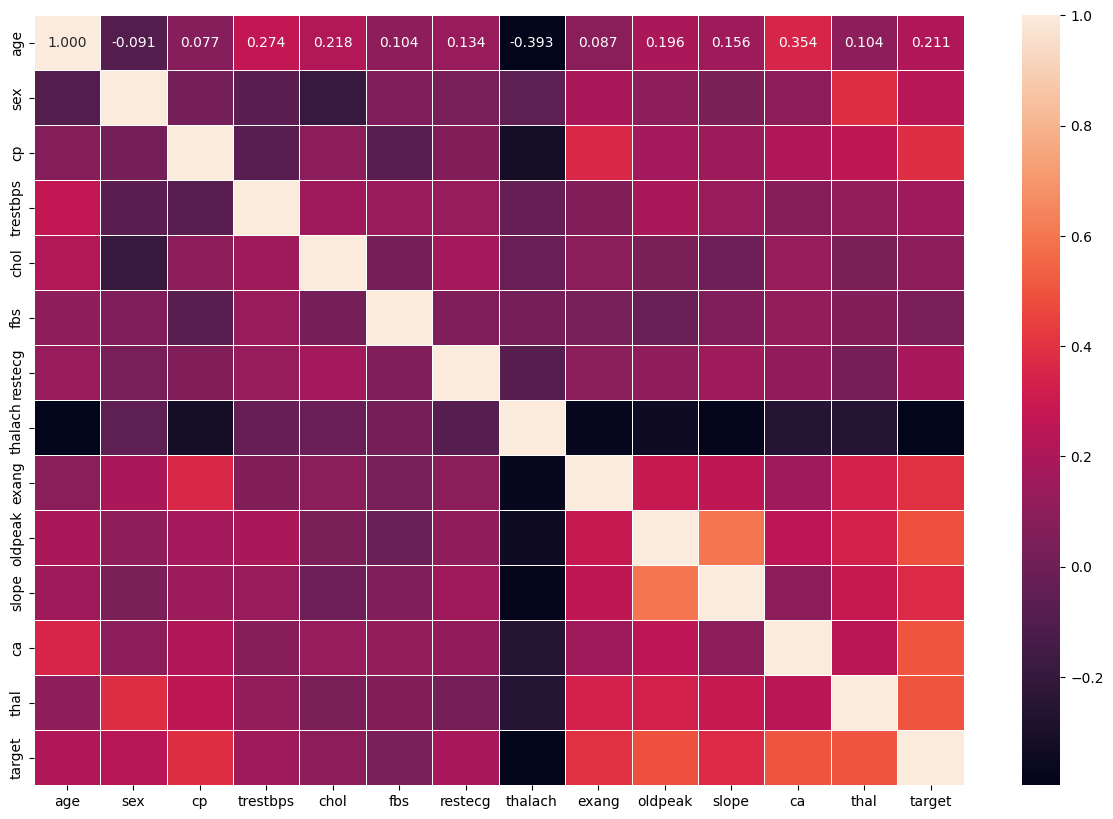

In [29]:
cor_mat=dfClean.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

# 6. Konstruksi Data

Dalam tahap ini Konstruksi data salah satu tujuannya yaitu untuk menyesuaikan semua tipe data yang ada di dalam dataset. Namun pada tahap ini dataset sudah memiliki tipe data yang sesuai sehingga tidak perlu dilakukan penyesuaian kembali

In [30]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        282 non-null    float64
 12  thal      282 non-null    float64
 13  target    282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [31]:
dfClean.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


Setelah Menyesuaikan tipe dataset kita , kita harus memisahkan antara fitur dan target lalu simpan kedalam variabel

In [32]:
X = dfClean.drop("target",axis=1).values
y = dfClean.iloc[:,-1]

Setelah kita memisahkan antara fitur dan target , sebaiknya kita melakukan pengecekan terlebih dahulu terhadap persebaran jumlah target terlebih dahulu.

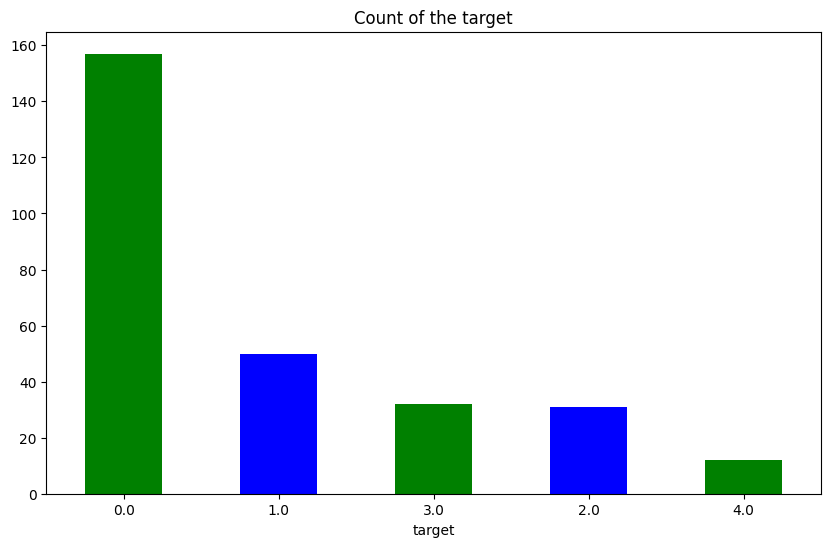

In [33]:
dfClean['target'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the target")
plt.xticks(rotation=0);


Pada Grafik diatas menunjukan bahwa persebaran jumlah target tidak seimbang oleh karena itu perlu diseimbangkan terlebih dahulu.
Menyeimbangkan target ada 2 cara yaitu oversampling dan undersampling. oversampling dilakukan jika jumlah dataset sedikit sedangkan undersampling dilakukan jika jumlah data terlalu banyak.
Disini kita akan melakukan oversampling dikarenakan jumlah data kita tidak banyak. Salah satu metode yang Oversampling yang akan kita gunakan adalah SMOTE


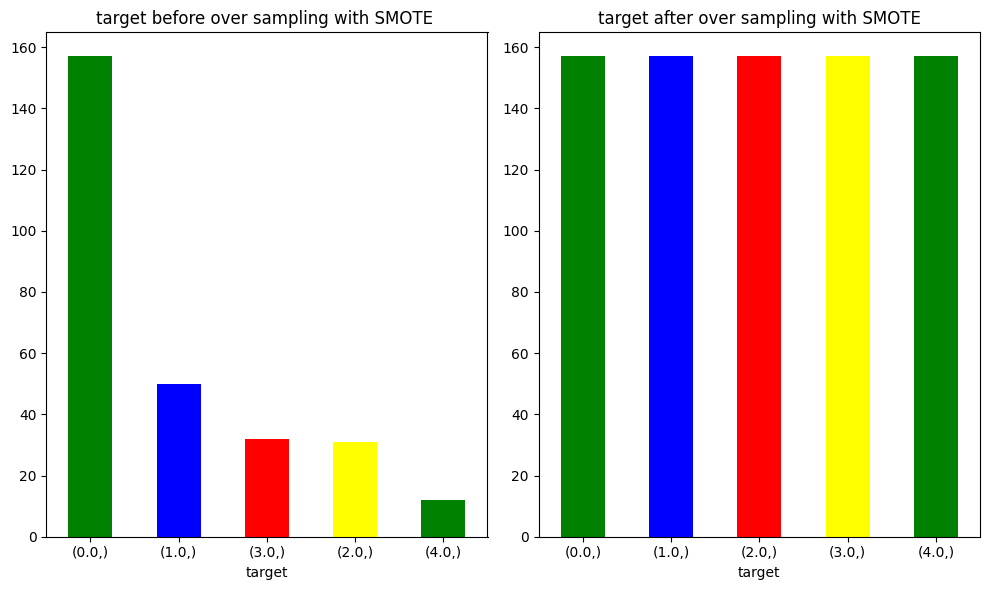

In [34]:
from imblearn.over_sampling import SMOTE

# oversampling
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

plt.figure(figsize=(12, 4))
new_df1 = pd.DataFrame(data=y)
plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target before over sampling with SMOTE ")
plt.xticks(rotation=0);


plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target after over sampling with SMOTE")
plt.xticks(rotation=0);

plt.tight_layout()
plt.show()


Pada Grafik diatas dapat dilihat ketika target belum di seimbangkan dan sudah diseimbangkan menggunakan oversampling.

In [35]:
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

target
0.0       157
1.0        50
3.0        32
2.0        31
4.0        12
Name: count, dtype: int64

In [36]:
# over
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()

target
0.0       157
1.0       157
2.0       157
3.0       157
4.0       157
Name: count, dtype: int64

Setelah menyeimbangkan persebaran jumlah target kita akan melakukan mengecekan apakah perlu dilakukan normalisasi/standarisasi pada datset kita.

In [37]:
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.563830,249.092199,0.148936,1.014184,149.765957,0.326241,1.026950,1.585106,0.666667,4.680851,0.907801
std,9.053083,0.468338,0.955405,17.757496,51.217546,0.356658,0.998118,22.923869,0.469670,1.138825,0.609700,0.933113,1.932377,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,165.750000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Pada deskripsi diatas dapat dilihat bahwa terdapat rentang nilai yang cukup jauh pada standar deviasi setiap fitur dataset yang kita miliki. Oleh karena itu perlu dilakukan normalisasi/standarisasi agar memperkecil rentang antara standar deviasi setiap kolom.

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)
len(X_smote_resampled_normal)

785

In [39]:
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000
mean,0.559445,0.780664,0.811789,0.374596,0.285383,0.140162,0.602946,0.542237,0.456058,0.238072,0.381666,0.349198,0.639917
std,0.168570,0.374983,0.283246,0.149340,0.111147,0.310030,0.440893,0.161073,0.443026,0.180516,0.258547,0.323277,0.423356
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.458333,0.659984,0.666667,0.264151,0.207870,0.000000,0.000000,0.422710,0.000000,0.091628,0.097991,0.000000,0.119594
50%,0.583333,1.000000,1.000000,0.358491,0.280822,0.000000,0.887086,0.543578,0.348039,0.225806,0.500000,0.333333,0.892559
75%,0.678864,1.000000,1.000000,0.469468,0.356164,0.000000,1.000000,0.668935,1.000000,0.368408,0.500000,0.657261,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Setelah dilakukan normalisasi pada fitur, selanjutnya kita perlu membagi fitur dan target menjadi data train dan test

In [40]:
from sklearn.model_selection import train_test_split


# membagi fitur dan target menjadi data train dan test (untuk yang oversample saja)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)


# membagi fitur dan target menjadi data train dan test (untuk yang oversample + normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42,stratify = y_smote_resampled)


# 7. Menentukan Label

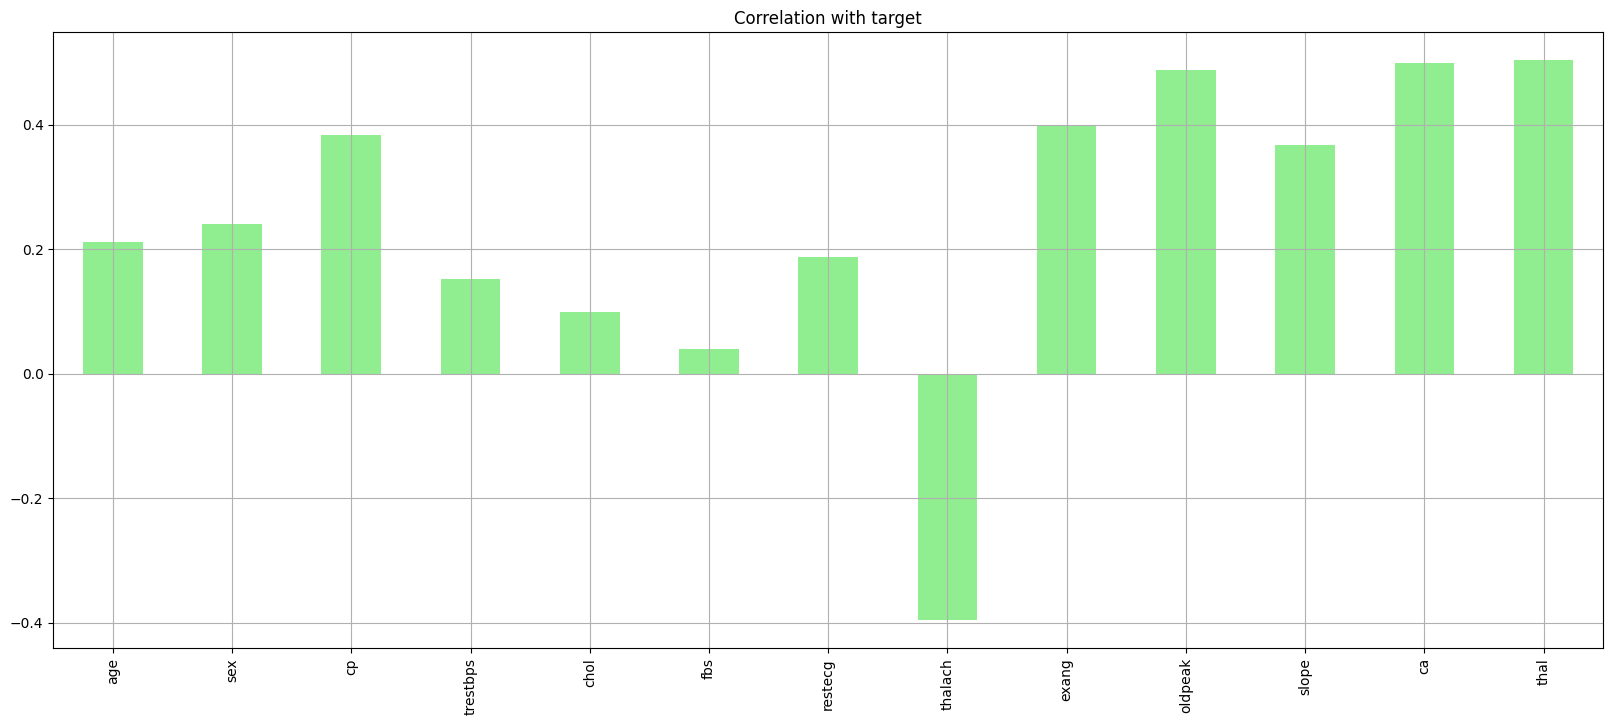

In [41]:
dfClean.drop('target', axis=1).corrwith(dfClean.target).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with target",color="lightgreen");

Dari hasil korelasi bisa dilihat fbs dan chol adalah yang paling sedikit berkorelasi dengan variabel target. Semua variabel lainnya memiliki korelasi yang signifikan dengan variabel target.

In [103]:
categorical_val = []
continous_val = []
for column in dfClean.columns:
    print('-------------------------------')
    print(f"{column} : {dfClean[column].unique()}")
    if len(dfClean[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

-------------------------------
age : [63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
-------------------------------
sex : [1. 0.]
-------------------------------
cp : [1. 4. 3. 2.]
-------------------------------
trestbps : [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154.]
-------------------------------
chol : [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257.

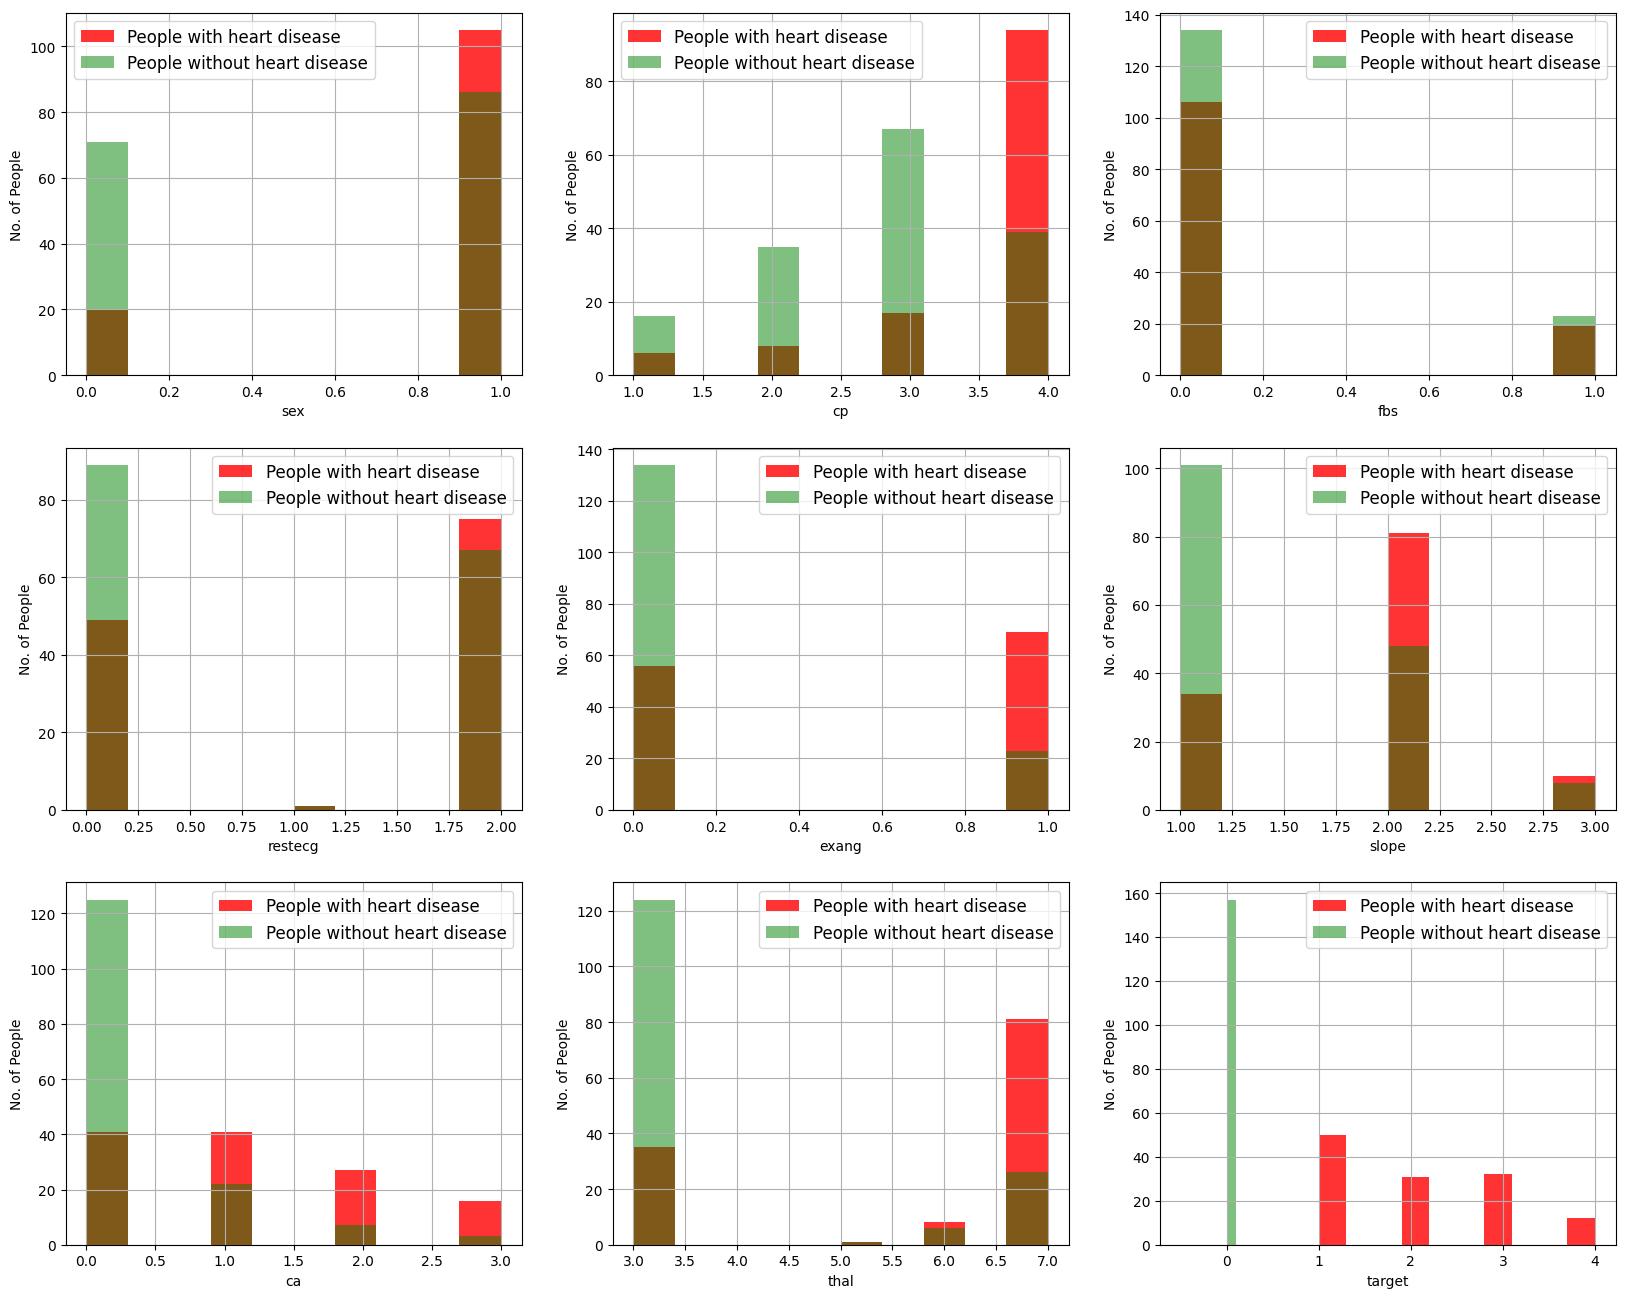

In [105]:
plt.figure(figsize=(20, 16))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    dfClean[dfClean["target"] != 0][column].hist(bins=10, color='red', label='People with heart disease',alpha=0.8)
    dfClean[dfClean["target"] == 0][column].hist(bins=10, color='green', label='People without heart disease',alpha=0.5)
    plt.legend(fontsize=12)
    plt.xlabel(column)
    plt.ylabel("No. of People")

Dari diagram diatas dapat disimpulkan :

1. cp : Orang dengan cp 1, 2, 3 lebih aman dari penyakit jantung dibandingkan orang dengan cp 0.
2. restecg : Orang dengan nilai 1-2 lebih mungkin terkena penyakit jantung.
3. exang : Orang dengan nilai 0 lebih mungkin terkena penyakit jantung dibandingkan orang dengan nilai 1.
4. slope : Orang dengan nilai slope 2 lebih besar kemungkinannya terkena penyakit jantung.
5. ca : orang dengan ca selain 0 lebih besar kemungkinannya terkena penyakit jantung.
6. thal : Orang dengan nilai thal antara 5-7 lebih mungkin terkena penyakit jantung.

In [42]:
# !pip install ydata-profiling

In [43]:
from ydata_profiling import ProfileReport
profile = ProfileReport(dfClean, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 8. Model

Pada tahap ini kita akan memulai untuk membangun sebuah model.

Dibawah ini merupakan sebuah fungsi untuk menampilkan hasil akurasi dan rata - rata dari recall , f1 dan precision score setiap model. Fungsi ini nantinya akan dipanggil di setiap model. Membuat Fungsi ini bersifat opsional.


In [44]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score
def evaluation(Y_test,Y_pred):
  acc = accuracy_score(Y_test,Y_pred)
  rcl = recall_score(Y_test,Y_pred,average = 'weighted')
  f1 = f1_score(Y_test,Y_pred,average = 'weighted')
  ps = precision_score(Y_test,Y_pred,average = 'weighted')

  metric_dict={
    'accuracy': round(acc,3),
    'recall': round(rcl,3),
    'F1 score': round(f1,3),
    'Precision score': round(ps,3)
  }

  return print(metric_dict)

## KNN

Pada tahap ini kita akan akan memulai membangun model dengan algoritma KNN dengan nilai neighbors yaitu 3.

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)
# save
with open('model/cleveland/knn.pkl','wb') as f:
    pickle.dump(knn_model,f)

Berikut adalah kode program untuk menampilkan hasil akurasi dengan algoritma KNN

In [46]:
y_pred_knn = knn_model.predict(X_test) # Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote = round(accuracy_score(y_test,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.701
Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.56      0.56        32
         1.0       0.61      0.74      0.67        31
         2.0       0.79      0.84      0.81        31
         3.0       0.76      0.69      0.72        32
         4.0       0.84      0.68      0.75        31

    accuracy                           0.70       157
   macro avg       0.71      0.70      0.70       157
weighted avg       0.71      0.70      0.70       157



In [47]:
evaluation(y_test,y_pred_knn)

{'accuracy': 0.701, 'recall': 0.701, 'F1 score': 0.702, 'Precision score': 0.71}


Pada visualisasi ini ditampilkan visualisasi confusion matrix untuk membandingkan hasil prediksi model dengan nilai sebenarnya.

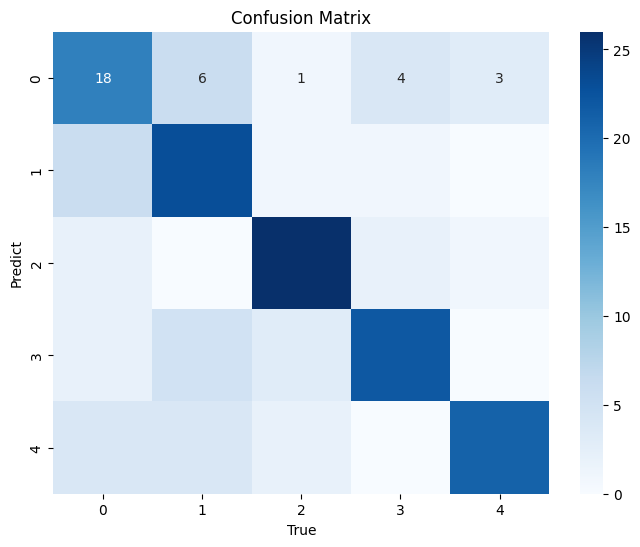

In [48]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## Random Forest

Selanjutnya kita akan membangun model dengan algoritma random forest dengan n_estimators yaitu 100, n_estimators sendiri berguna
mengatur jumlah pohon keputusan yang akan dibangun


In [49]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# save
with open('model/cleveland/rf.pkl','wb') as f:
    pickle.dump(rf_model,f)

In [50]:
y_pred_rf = rf_model.predict(X_test)
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))



Random Forest Model:
Accuracy: 0.949
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        32
         1.0       1.00      0.87      0.93        31
         2.0       0.91      0.94      0.92        31
         3.0       0.97      0.97      0.97        32
         4.0       1.00      1.00      1.00        31

    accuracy                           0.95       157
   macro avg       0.95      0.95      0.95       157
weighted avg       0.95      0.95      0.95       157



In [51]:
evaluation(y_test,y_pred_rf)

{'accuracy': 0.949, 'recall': 0.949, 'F1 score': 0.949, 'Precision score': 0.952}


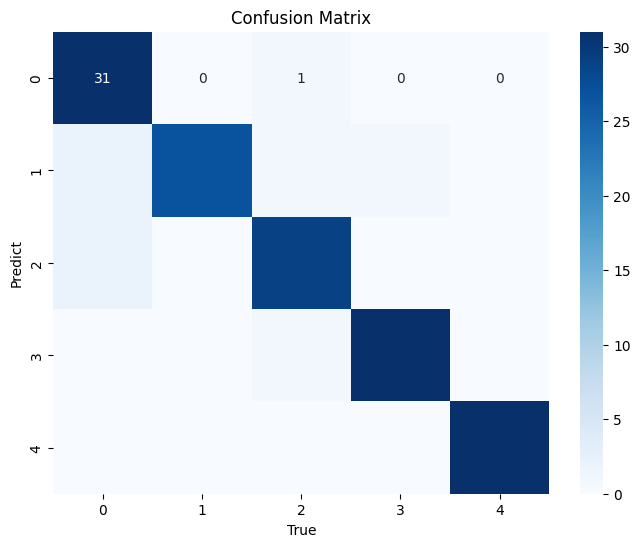

In [52]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## XGBoost

Pada tahap ini dalam membangun model, kita akan menggunakan algoritma XGBoost dengan learning rate yaitu 0.1. learning rate berguna untuk mengontrol seberapa besar kita menyesuaikan bobot model

In [53]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
# save
with open('model/cleveland/xgb.pkl','wb') as f:
    pickle.dump(xgb_model,f)

In [54]:
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Accuracy: 0.885
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88        32
         1.0       0.89      0.77      0.83        31
         2.0       0.87      0.87      0.87        31
         3.0       0.88      0.88      0.88        32
         4.0       0.97      0.97      0.97        31

    accuracy                           0.89       157
   macro avg       0.89      0.89      0.88       157
weighted avg       0.89      0.89      0.88       157



In [55]:
evaluation(y_test,y_pred_xgb)

{'accuracy': 0.885, 'recall': 0.885, 'F1 score': 0.885, 'Precision score': 0.887}


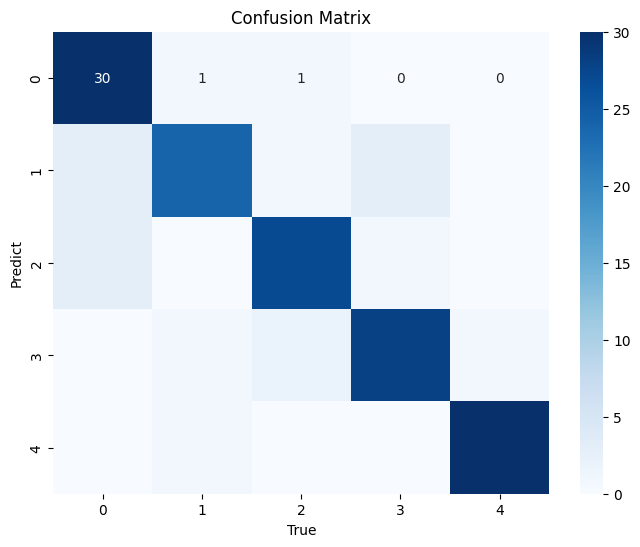

In [56]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


## SVM

In [57]:
from sklearn import svm
svm_model = svm.SVC(kernel='rbf', gamma=1, C=100)
svm_model.fit(X_train, y_train)

# save
with open('model/cleveland/svm.pkl','wb') as f:
    pickle.dump(svm_model,f)

In [58]:
y_pred_svm = svm_model.predict(X_test) # Evaluate the SVM model
print("SVM Model:")
accuracy_svm_smote = round(accuracy_score(y_test,y_pred_svm),3)
print("Accuracy:", accuracy_svm_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Model:
Accuracy: 0.376
Classification Report:
              precision    recall  f1-score   support

         0.0       0.25      1.00      0.40        32
         1.0       1.00      0.16      0.28        31
         2.0       1.00      0.29      0.45        31
         3.0       1.00      0.19      0.32        32
         4.0       1.00      0.23      0.37        31

    accuracy                           0.38       157
   macro avg       0.85      0.37      0.36       157
weighted avg       0.85      0.38      0.36       157



In [59]:
evaluation(y_test,y_pred_svm)

{'accuracy': 0.376, 'recall': 0.376, 'F1 score': 0.361, 'Precision score': 0.846}


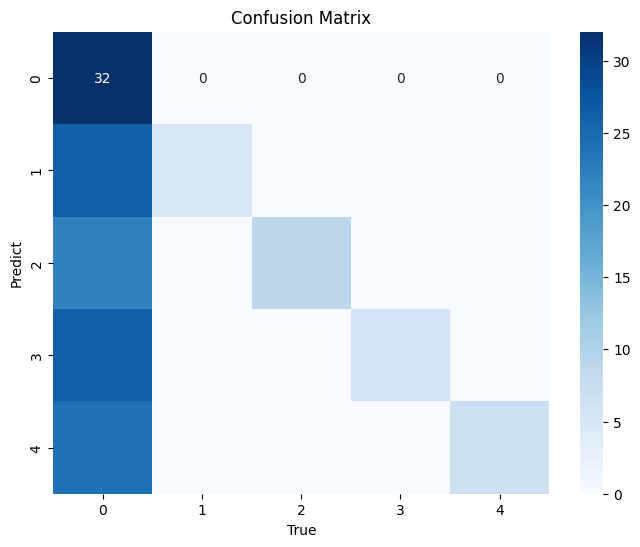

In [60]:
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## Oversample + Normalisasi

Pada bagian ini kita akan membuat sebuah model yang dimana data yang dipakai kali ini yang sudah dilakukan oversample dan normalisasi. Algoritma yang digunakan sama seperti sebelumnya yaitu KNN, Random Forest, dan XGBoost. Sekaligus dibuat visualisasi hasil evaluasi pada masing-masing model.

### KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normal, y_train_normal)
# save
with open('model/cleveland/knn_oversample.pkl','wb') as f:
    pickle.dump(knn_model,f)

In [62]:
y_pred_knn = knn_model.predict(X_test_normal)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))



K-Nearest Neighbors (KNN) Model:
Accuracy: 0.822
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.75      0.83        32
         1.0       0.72      0.74      0.73        31
         2.0       0.74      0.84      0.79        31
         3.0       0.84      0.81      0.83        32
         4.0       0.91      0.97      0.94        31

    accuracy                           0.82       157
   macro avg       0.83      0.82      0.82       157
weighted avg       0.83      0.82      0.82       157



In [63]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.822, 'recall': 0.822, 'F1 score': 0.822, 'Precision score': 0.827}


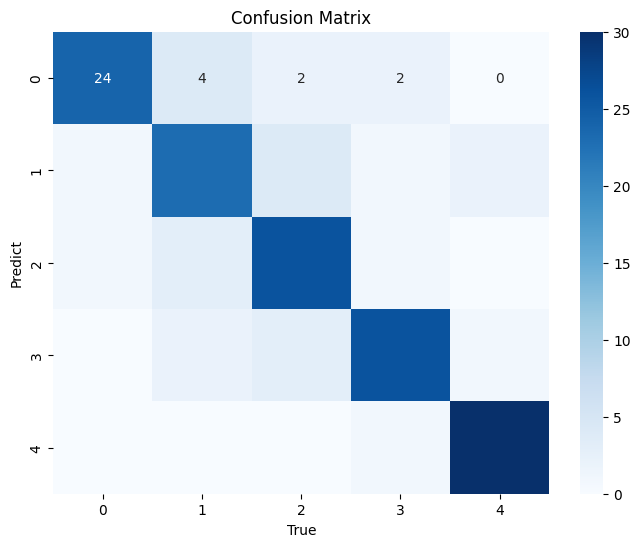

In [64]:
cm = confusion_matrix(y_test_normal, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


### Random Forest

In [65]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)
# save
with open('model/cleveland/rf_oversample.pkl','wb') as f:
    pickle.dump(rf_model,f)

In [66]:
y_pred_rf = rf_model.predict(X_test_normal)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal )
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))



Random Forest Model:
Accuracy: 0.949
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        32
         1.0       1.00      0.87      0.93        31
         2.0       0.91      0.94      0.92        31
         3.0       0.97      0.97      0.97        32
         4.0       1.00      1.00      1.00        31

    accuracy                           0.95       157
   macro avg       0.95      0.95      0.95       157
weighted avg       0.95      0.95      0.95       157



In [67]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.949, 'recall': 0.949, 'F1 score': 0.949, 'Precision score': 0.952}


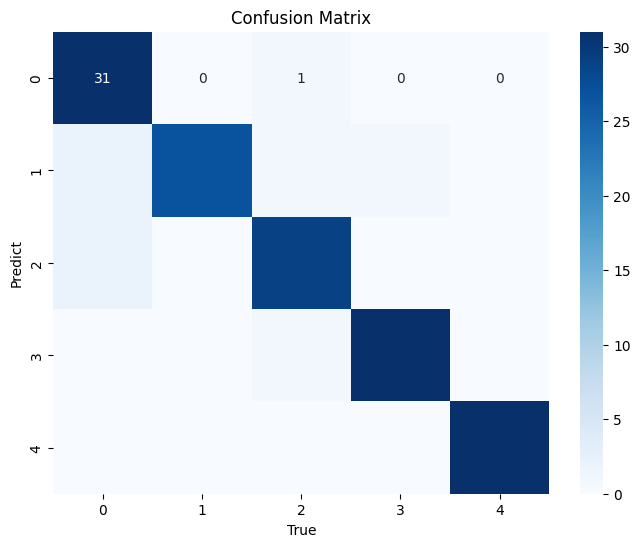

In [68]:
cm = confusion_matrix(y_test_normal, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


### XGBoost

In [69]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)
# save
with open('model/cleveland/xgb_oversample.pkl','wb') as f:
    pickle.dump(xgb_model,f)

In [70]:
y_pred_xgb = xgb_model.predict(X_test_normal)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))



XGBoost Model:
Accuracy: 0.885
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88        32
         1.0       0.89      0.77      0.83        31
         2.0       0.87      0.87      0.87        31
         3.0       0.88      0.88      0.88        32
         4.0       0.97      0.97      0.97        31

    accuracy                           0.89       157
   macro avg       0.89      0.89      0.88       157
weighted avg       0.89      0.89      0.88       157



In [71]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.885, 'recall': 0.885, 'F1 score': 0.885, 'Precision score': 0.887}


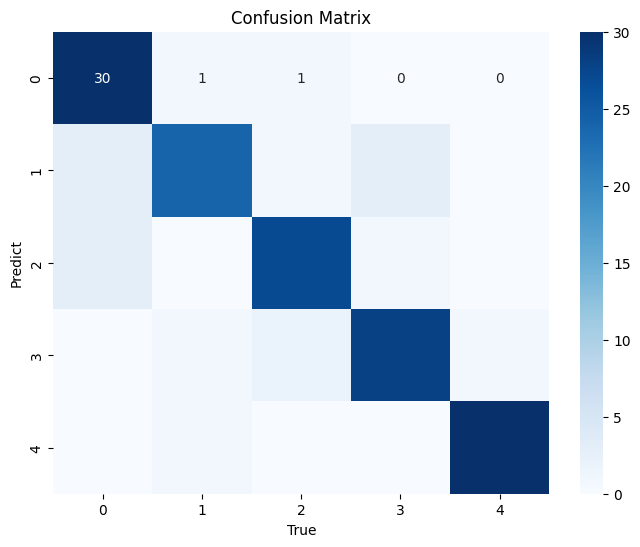

In [72]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


### SVM

In [73]:
svm_model = svm.SVC(kernel='rbf', gamma=1, C=100)
svm_model.fit(X_train_normal, y_train_normal)
# save
with open('model/cleveland/svm_oversample.pkl','wb') as f:
    pickle.dump(svm_model,f)

In [74]:
y_pred_svm = svm_model.predict(X_test_normal)

# Evaluate the SVM model
print("\nSVM Model:")
accuracy_svm_smote_normal = round(accuracy_score(y_test_normal, y_pred_svm),3)
print("Accuracy:",accuracy_svm_smote_normal )
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_svm))


SVM Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.81      0.87        32
         1.0       0.82      0.90      0.86        31
         2.0       0.87      0.87      0.87        31
         3.0       0.91      0.94      0.92        32
         4.0       1.00      1.00      1.00        31

    accuracy                           0.90       157
   macro avg       0.91      0.90      0.90       157
weighted avg       0.91      0.90      0.90       157



In [75]:
evaluation(y_test_normal,y_pred_svm)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.907}


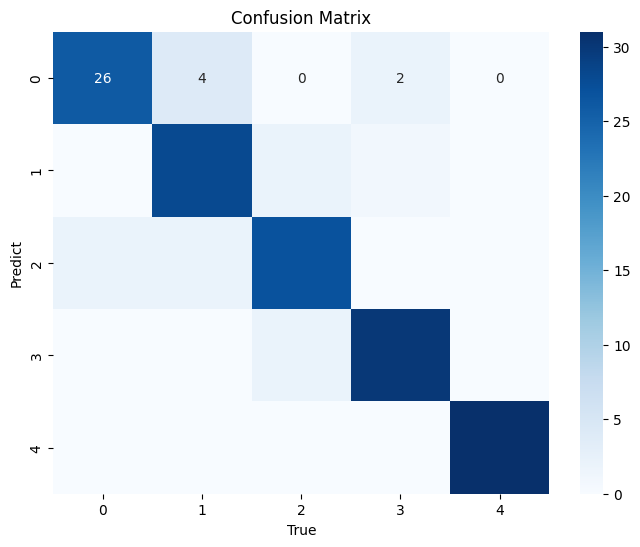

In [76]:
cm = confusion_matrix(y_test_normal, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## Tunning + Normalization + Oversample

Pada pembuatan model kali ini masih menggunakan algoritma yang sama (KNN, Random Forest, dan XGBoost), namun data yang digunakan adalah data yang sudah dilakukan TunNIng Parameter, Normalisasi, dan Oversample.

### KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

Setiap parameter tunnning tidak selalu sama karena bergantung pada algoritma yang digunakan.

In [78]:
knn_model = KNeighborsClassifier()
param_grid = {
  "n_neighbors": range(3, 21),
  "metric": ["euclidean", "manhattan", "chebyshev"], "weights": ["uniform", "distance"],
  "algorithm": ["auto", "ball_tree", "kd_tree"], "leaf_size": range(10, 61),
}

knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)

knn_model.fit(X_train_normal, y_train_normal)
# save
with open('model/cleveland/knn_tunning.pkl','wb') as f:
    pickle.dump(knn_model,f)

best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")


Best parameters: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan', 'leaf_size': 18, 'algorithm': 'auto'}


In [79]:
y_pred_knn = knn_model.predict(X_test_normal)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))


K-Nearest Neighbors (KNN) Model:
Accuracy: 0.898
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.84      0.90        32
         1.0       0.86      0.81      0.83        31
         2.0       0.86      0.97      0.91        31
         3.0       0.88      0.91      0.89        32
         4.0       0.94      0.97      0.95        31

    accuracy                           0.90       157
   macro avg       0.90      0.90      0.90       157
weighted avg       0.90      0.90      0.90       157



In [80]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.898, 'recall': 0.898, 'F1 score': 0.897, 'Precision score': 0.9}


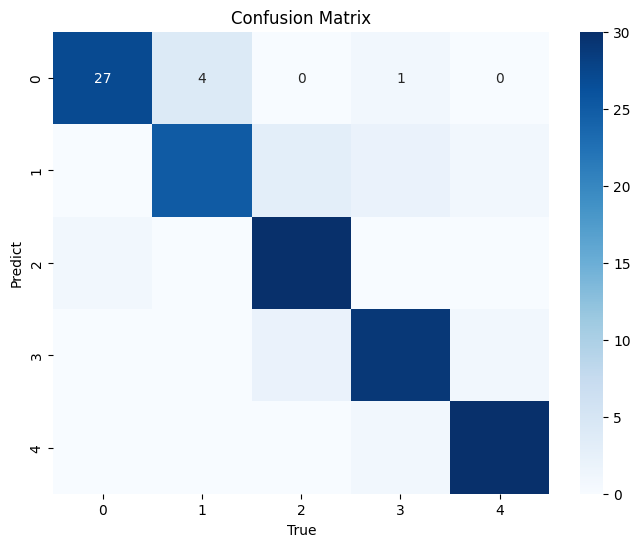

In [81]:
cm = confusion_matrix(y_test_normal, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Random Forest

In [82]:
rf_model = RandomForestClassifier()

param_grid = {
  "n_estimators": [100, 200],
  "max_depth": [ 10, 15],
  "min_samples_leaf": [1, 2],
  "min_samples_split": [2, 5],
  "max_features": ["sqrt", "log2"],
  "random_state": [42, 100, 200]
}

rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)
rf_model.fit(X_train_normal, y_train_normal)
# save
with open('model/cleveland/rf_tunning.pkl','wb') as f:
    pickle.dump(rf_model,f)
best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")


c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'random_state': 100, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


In [83]:
y_pred_rf = rf_model.predict(X_test_normal)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.949
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        32
         1.0       1.00      0.87      0.93        31
         2.0       0.91      0.94      0.92        31
         3.0       0.97      0.97      0.97        32
         4.0       1.00      1.00      1.00        31

    accuracy                           0.95       157
   macro avg       0.95      0.95      0.95       157
weighted avg       0.95      0.95      0.95       157



In [84]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.949, 'recall': 0.949, 'F1 score': 0.949, 'Precision score': 0.952}


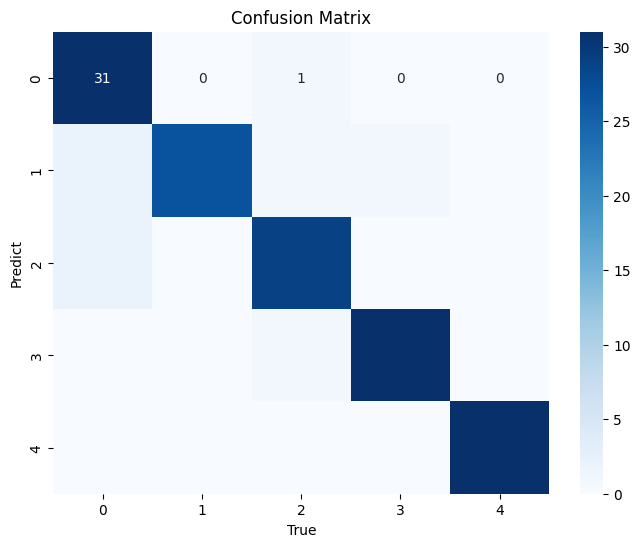

In [85]:
cm = confusion_matrix(y_test_normal, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


### XGBoost

In [86]:
xgb_model = XGBClassifier()
param_grid = {
  "max_depth": [3, 5, 7],
  "learning_rate": [0.01, 0.1],
  "n_estimators": [100, 200],
  "gamma": [0, 0.1],
  "colsample_bytree": [0.7, 0.8]
}

xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)

xgb_model.fit(X_train_normal, y_train_normal)
# save
with open('model/cleveland/xgb_tunning.pkl','wb') as f:
    pickle.dump(xgb_model,f)

best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}


In [87]:
y_pred_xgb = xgb_model.predict(X_test_normal)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))



XGBoost Model:
Accuracy: 0.892
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87        32
         1.0       0.92      0.77      0.84        31
         2.0       0.90      0.84      0.87        31
         3.0       0.83      0.94      0.88        32
         4.0       1.00      1.00      1.00        31

    accuracy                           0.89       157
   macro avg       0.90      0.89      0.89       157
weighted avg       0.90      0.89      0.89       157



In [88]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.892, 'recall': 0.892, 'F1 score': 0.891, 'Precision score': 0.895}


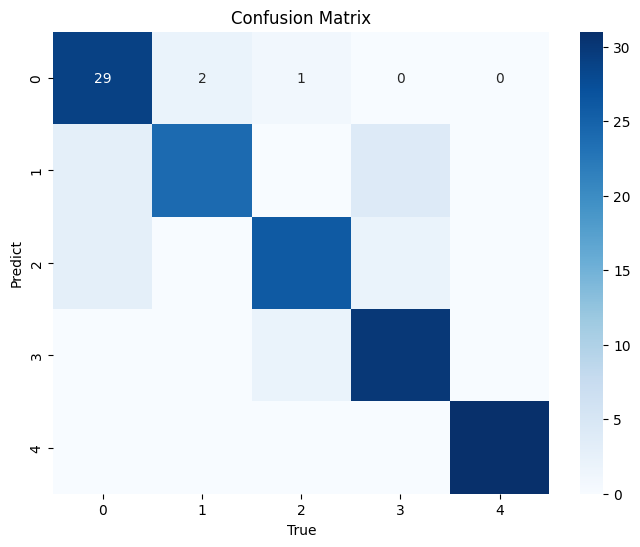

In [89]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### SVM

In [90]:
svm_model = svm.SVC()
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear'],                 # The kernel coefficient
}

svm_model = RandomizedSearchCV(
    estimator=svm_model, 
    param_distributions=param_grid, 
    n_iter=100, 
    scoring="accuracy", 
    cv=5,
    n_jobs=5,
    verbose=1
)

svm_model.fit(X_train_normal, y_train_normal)

# save
with open('model/cleveland/svm_tunning.pkl','wb') as f:
    pickle.dump(svm_model,f)

best_params = svm_model.best_params_
print(f"Best parameters: {best_params}")

c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 50 is smaller than n_iter=100. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'kernel': 'rbf', 'gamma': 1, 'C': 100}


In [91]:
y_pred_svm = svm_model.predict(X_test_normal)

# Evaluate the SVM model
print("\nSVM Model:")
accuracy_svm_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_svm),3)
print("Accuracy:",accuracy_svm_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_svm))


SVM Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.81      0.87        32
         1.0       0.82      0.90      0.86        31
         2.0       0.87      0.87      0.87        31
         3.0       0.91      0.94      0.92        32
         4.0       1.00      1.00      1.00        31

    accuracy                           0.90       157
   macro avg       0.91      0.90      0.90       157
weighted avg       0.91      0.90      0.90       157



In [92]:
evaluation(y_test_normal,y_pred_svm)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.907}


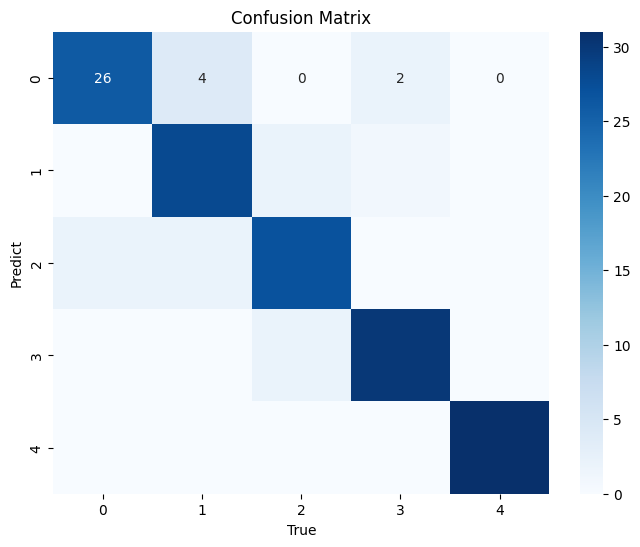

In [93]:
cm = confusion_matrix(y_test_normal, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# 9. Evaluasi

Selanjutnya kita akan melakukan evaluasi data sekaligus membandingkan antar algoritma guna dengan tujuan mengetahui jenis model algoritma yang menghasilkan hasil akurasi terbaik.

In [94]:
import matplotlib.pyplot as plt

model_comp1 = pd.DataFrame({
      'Model': ['K-Nearest Neighbour','Random Forest', 'XGBoost', 'SVM'],
      'Accuracy': [accuracy_knn_smote*100, accuracy_rf_smote*100, accuracy_xgb_smote*100, accuracy_svm_smote*100],
    })

model_comp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,70.1
1,Random Forest,94.9
2,XGBoost,88.5
3,SVM,37.6


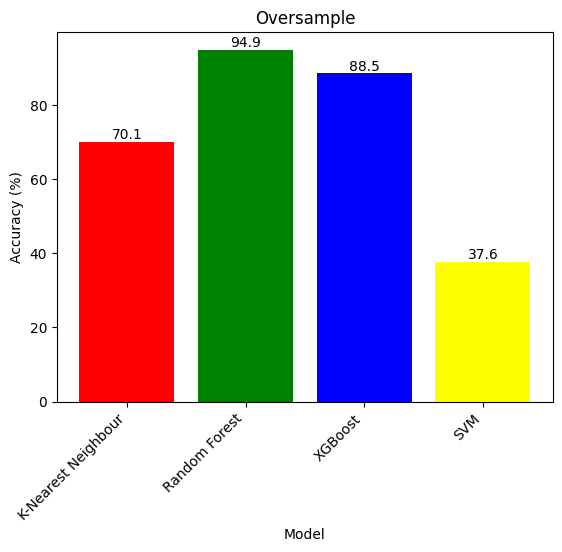

In [95]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue', 'yellow'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [96]:
model_comp2 = pd.DataFrame({
      'Model': ['K-Nearest Neighbour','Random Forest', 'XGBoost', 'SVM'],
      'Accuracy': [accuracy_knn_smote_normal*100, accuracy_rf_smote_normal*100,accuracy_xgb_smote_normal*100, accuracy_svm_smote_normal*100],
    })
model_comp2.head()

,Model,Accuracy
0,K-Nearest Neighbour,82.2
1,Random Forest,94.9
2,XGBoost,88.5
3,SVM,90.4


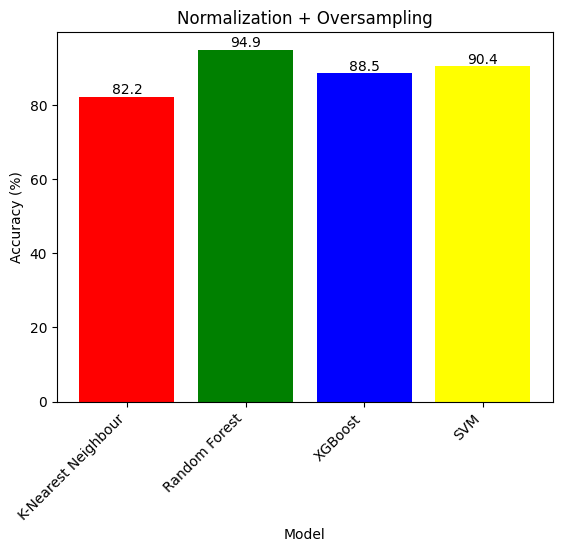

In [97]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue', 'yellow'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()


In [98]:
model_comp3 = pd.DataFrame({
      'Model': ['K-Nearest Neighbour','Random Forest', 'XGBoost', 'SVM'],
      'Accuracy': [accuracy_knn_smote_normal_Tun*100, accuracy_rf_smote_normal_Tun*100,accuracy_xgb_smote_normal_Tun*100, accuracy_svm_smote_normal_Tun*100]
    })
model_comp3.head()


,Model,Accuracy
0,K-Nearest Neighbour,89.8
1,Random Forest,94.9
2,XGBoost,89.2
3,SVM,90.4


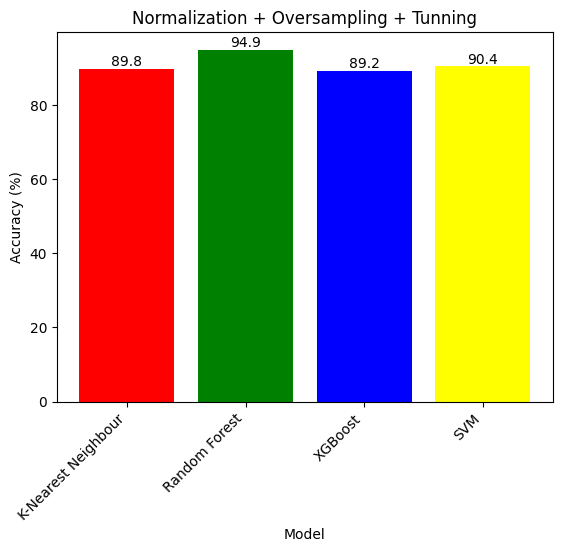

In [99]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue', 'yellow'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()


In [100]:
# Data frame
acc_knn_model = pd.DataFrame({
    'model': ['KNN Oversampling', 'KNN Normal + Oversampling', 'KNN Normal + Oversampling + Tunning'],
    'accuracy': [accuracy_knn_smote, accuracy_knn_smote_normal, accuracy_knn_smote_normal_Tun]
})
acc_rf_model = pd.DataFrame({
    'model': ['RF Oversampling', 'RF Normal + Oversampling', 'RF Normal + Oversampling + Tunning'],
    'accuracy': [accuracy_rf_smote, accuracy_rf_smote_normal, accuracy_rf_smote_normal_Tun]
})
acc_xgb_model = pd.DataFrame({
    'model': ['XGB Oversampling', 'XGB Normal + Oversampling', 'XGB Normal + Oversampling + Tunning'],
    'accuracy': [accuracy_xgb_smote, accuracy_xgb_smote_normal, accuracy_xgb_smote_normal_Tun]
})
acc_svm_model = pd.DataFrame({
    'model': ['SVM Oversampling', 'SVM Normal + Oversampling', 'SVM Normal + Oversampling + Tunning'],
    'accuracy': [accuracy_svm_smote, accuracy_svm_smote_normal, accuracy_svm_smote_normal_Tun]
})
knn_best_model = acc_knn_model[acc_knn_model['accuracy']==acc_knn_model['accuracy'].max()]
rf_best_model = acc_rf_model[acc_rf_model['accuracy']==acc_rf_model['accuracy'].max()]
xgb_best_model = acc_xgb_model[acc_xgb_model['accuracy']==acc_xgb_model['accuracy'].max()]
svm_best_model = acc_svm_model[acc_svm_model['accuracy']==acc_svm_model['accuracy'].max()]

print(knn_best_model)
print(rf_best_model)
print(xgb_best_model)
print(svm_best_model)

                                 model  accuracy
2  KNN Normal + Oversampling + Tunning     0.898
                                model  accuracy
0                     RF Oversampling     0.949
1            RF Normal + Oversampling     0.949
2  RF Normal + Oversampling + Tunning     0.949
                                 model  accuracy
2  XGB Normal + Oversampling + Tunning     0.892
                                 model  accuracy
1            SVM Normal + Oversampling     0.904
2  SVM Normal + Oversampling + Tunning     0.904


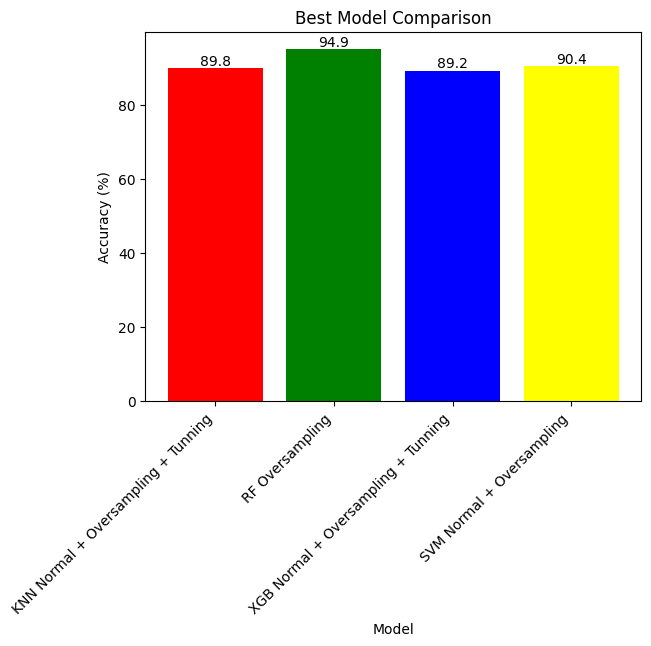

In [101]:

model_compBest = pd.DataFrame({
    'Model': [knn_best_model['model'].values[0], rf_best_model['model'].values[0], xgb_best_model['model'].values[0], svm_best_model['model'].values[0]],
    'Accuracy': [knn_best_model['accuracy'].values[0]*100, rf_best_model['accuracy'].values[0]*100, xgb_best_model['accuracy'].values[0]*100, svm_best_model['accuracy'].values[0]*100]
})

# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue', 'yellow'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

# 10. Kesimpulan

Dari hasil penelitian diatas dengan menggunakan 4 model yaitu KNN, Random Forest, XGBoost dan SVM. Dengan menggunakan beberapa cara dalam penanganan data yaitu, random over sampling dengan SMOTE untuk imbalance data, RandomSearchCV untuk tunning, dan normalisasi data. 
Untuk model KNN dan SVM bisa dilihat bahwa penanganan data yang dilakukan sangat berpengaruh dengan hasil akurasi akhir. Untuk model Random Forest dan XGBoost penanganan data tidak terlalu berpengaruh dengan hasil akurasi akhir.
Dari ketiga model tersebut didapatkan hasil akurasi terbaik yaitu 93% dengan model Random Forest dengan penanganan data normalisasi, Oversample dan Tunning.
Dari hasil tersebut dapat disimpulkan bahwa penanganan dalam ketidakseimbangan data dengan menggunakan tunning parameter, normalisasi dan oversampling dapat memberikan dampak signifikan pada hasil akhir akurasi sebuah model.